# Задание: Градиентный бустинг над решающими деревьями

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/uDU31/gradiientnyi-bustingh-nad-rieshaiushchimi-dieriev-iami

1 Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.metrics import log_loss
from pandas import read_csv
import sys
sys.path.append('../..')
from lib import *
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [ ]:
xd = read_csv('gbm-data.csv')

In [ ]:
xn = xd.values

In [ ]:
xd

In [ ]:
from sklearn.cross_validation import train_test_split as split
xl, xt = split(xn, test_size=0.8, random_state=241)

In [ ]:
xlx, xly = xl[:,1:], xl[:,0]
xtx, xty = xt[:,1:], xt[:,0]
xl.size, xt.size

2 Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

2.1 Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

2.2 Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказаное значение.

2.3 Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [172]:
gc = lambda r: GBC(n_estimators=250, verbose=True, random_state=241, learning_rate=r).fit(xlx, xly)
sig = lambda y: 1/(1+exp(-y))
def p(clf):
    p = np.zeros((250,), dtype=np.float64)
    # pp = np.copy(p)
    for i, yp in enumerate(clf.staged_decision_function(xtx)):
        ys = np.array(list(map(sig, yp)))
    #     pp[i] = clf.loss_(xty, yp)
    #     pp[i] = log_loss(xty, yp)
        p[i] = log_loss(xty, ys)
    return p
def plot(p):
    plt.plot(p)
    # plt.plot(pp)
    ym = p.min()
    xm = p.argmin()
    plt.axvline(xm, c='k', ls='--', label='xm')
    plt.axhline(ym, c='r', ls='--', label=ym)
    plt.legend(['test', xm, ym])
    return xm, ym
w = lambda r: plot(p(gc(r)))

      Iter       Train Loss   Remaining Time 
         1           1.3199           27.95s
         2           1.2645           28.18s
         3           1.2170           27.31s
         4           1.1775           26.72s
         5           1.1404           26.04s
         6           1.1106           25.83s
         7           1.0844           25.51s
         8           1.0617           32.91s
         9           1.0411           34.91s
        10           1.0223           37.85s
        20           0.8864           28.09s
        30           0.7844           26.66s
        40           0.7176           23.11s
        50           0.6590           20.79s
        60           0.6120           18.38s
        70           0.5599           16.59s
        80           0.5242           15.06s
        90           0.4829           13.70s
       100           0.4473           12.47s
       200           0.2379            3.81s
(51, 0.52646461382579068)


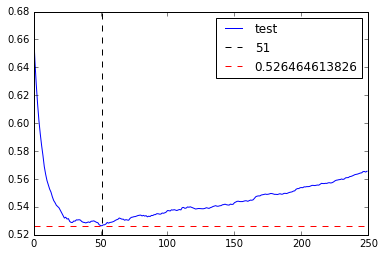

In [173]:
print(w(0.1))

3 Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [ ]:
pf('c0_w5_s2_1', 'underfitting|overfitting')

4 Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2.

      Iter       Train Loss   Remaining Time 
         1           1.2613           14.55s
         2           1.1715           18.18s
         3           1.1009           21.75s
         4           1.0529           21.62s
         5           1.0130           21.82s
         6           0.9740           22.52s
         7           0.9475           22.76s
         8           0.9197           22.54s
         9           0.8979           22.30s
        10           0.8730           22.11s
        20           0.7207           17.33s
        30           0.6055           15.17s
        40           0.5244           13.90s
        50           0.4501           12.91s
        60           0.3908           12.19s
        70           0.3372           11.52s
        80           0.3009           10.85s
        90           0.2603           10.56s
       100           0.2327            9.78s
       200           0.0835            4.19s


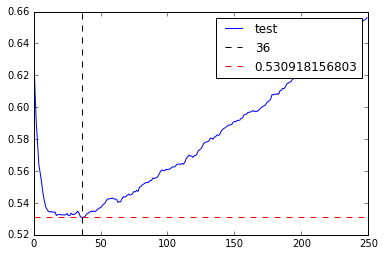

In [174]:
i, m = w(0.2)

In [ ]:
pf('c0_w5_s2_2', pp([round(m, 2), i]))

5 На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(n_estimators=i, random_state=241).fit(xlx, xly)

In [ ]:
# y = clf.predict_log_proba(xtx)
pf('c0_w5_s2_3', round(log_loss(xty, clf.predict_proba(xtx)[:, 1]), 2))